# Importing the necessary libraries

### The libraries are needed to load and process data, visualise trends, eventually train and evaluate the model.

In [1]:
import os
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import pickle

# Importing the dataset

In [2]:
df = pd.read_csv('flightdata.csv')
df.columns = df.columns.str.strip()
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


# Analysing the Data

In [3]:
print(df.shape)
df.info()
df.describe()

(11231, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            111

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,...,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000,0.0
mean,2016.0,2.544475,6.628973,15.790758,3.960199,1334.325617,12334.516695,12302.274508,1320.798326,1327.189410,...,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965,NaN
std,0.0,1.090701,3.354678,8.782056,1.995257,811.875227,1595.026510,1601.988550,490.737845,500.306462,...,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379,NaN
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,...,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000,NaN
25%,2016.0,2.000000,4.000000,8.000000,2.000000,624.000000,10397.000000,10397.000000,905.000000,905.000000,...,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000,NaN
50%,2016.0,3.000000,7.000000,16.000000,4.000000,1267.000000,12478.000000,12478.000000,1320.000000,1324.000000,...,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000,NaN
75%,2016.0,3.000000,9.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1739.000000,...,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000,NaN
max,2016.0,4.000000,12.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,...,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000,NaN


# Handling the missing values

In [4]:
print(df.isnull().sum())
df['DEST'].unique()


YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64


array(['SEA', 'MSP', 'DTW', 'ATL', 'JFK'], dtype=object)

# Visualising the Data

<Axes: xlabel='ARR_DELAY', ylabel='ARR_DEL15'>

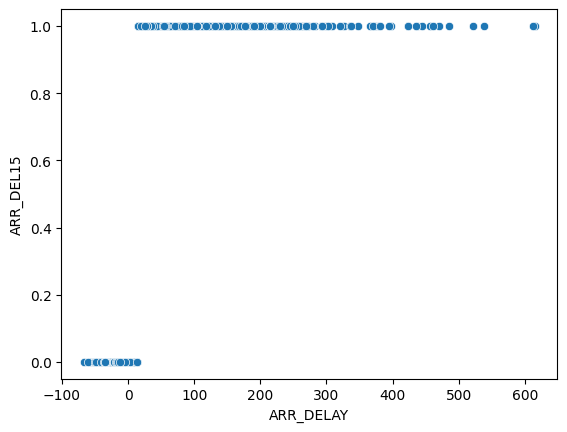

In [5]:
sns.scatterplot(x='ARR_DELAY', y='ARR_DEL15', data=df)

C:\Users\sunda\AppData\Local\Temp\ipykernel_23232\3768837567.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='ARR_DEL15', y='ARR_DELAY', palette='Set2')


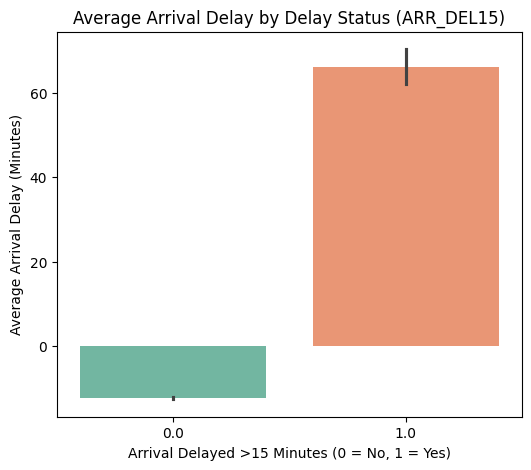

In [6]:
plt.figure(figsize=(6, 5))
sns.barplot(data=df, x='ARR_DEL15', y='ARR_DELAY', palette='Set2')
plt.title('Average Arrival Delay by Delay Status (ARR_DEL15)')
plt.xlabel('Arrival Delayed >15 Minutes (0 = No, 1 = Yes)')
plt.ylabel('Average Arrival Delay (Minutes)')
plt.show()

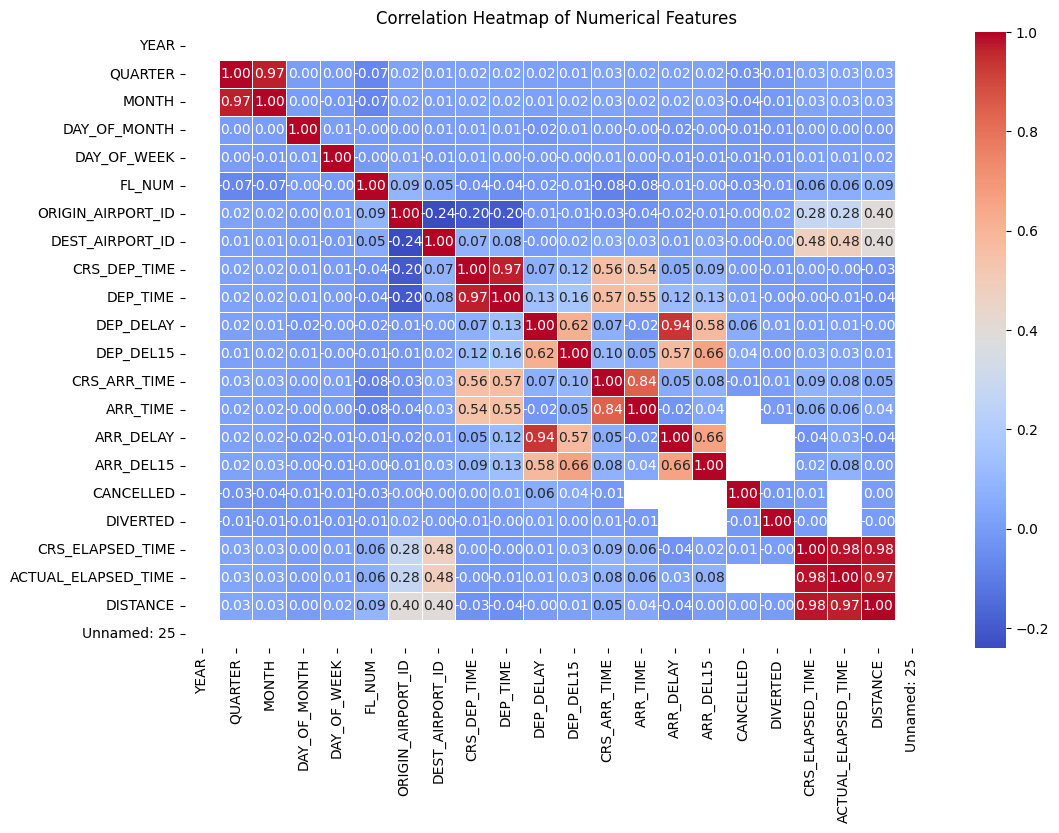

In [7]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


## Dropping Unnecessary Columns

In [8]:
df = df.drop('Unnamed: 25', axis = 1)
df.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

### Filter the dataset to eliminate columns that aren't relevant to a predictive model.

In [9]:
df = df[["FL_NUM", "MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST", "CRS_ARR_TIME", "DEP_DEL15", "ARR_DEL15"]]
df.isnull().sum()

FL_NUM            0
MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_ARR_TIME      0
DEP_DEL15       107
ARR_DEL15       188
dtype: int64

### Replace the missing value 0s and 1s

In [10]:
df = df.fillna({"ARR_DEL15": 1})
df = df.fillna({"DEP_DEL15": 0})
df.iloc[177:185]

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
177,2834,1,9,6,MSP,SEA,852,0.0,1.0
178,2839,1,9,6,DTW,JFK,1724,0.0,0.0
179,86,1,10,7,MSP,DTW,1632,0.0,1.0
180,87,1,10,7,DTW,MSP,1649,1.0,0.0
181,423,1,10,7,JFK,ATL,1600,0.0,0.0
182,440,1,10,7,JFK,ATL,849,0.0,0.0
183,485,1,10,7,JFK,SEA,1945,1.0,0.0
184,557,1,10,7,MSP,DTW,912,0.0,1.0


In [11]:
for index, row in df.iterrows():
    df.loc[index, 'CRS_ARR_TIME'] = math.floor(row['CRS_ARR_TIME'] /100)
df.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,ATL,SEA,21,0.0,0.0
1,1476,1,1,5,DTW,MSP,14,0.0,0.0
2,1597,1,1,5,ATL,SEA,12,0.0,0.0
3,1768,1,1,5,SEA,MSP,13,0.0,0.0
4,1823,1,1,5,SEA,DTW,6,0.0,0.0


# Label Encoding and One Hot Encoding

In [12]:
le = LabelEncoder()
df['DEST'] = le.fit_transform(df['DEST'])
df['ORIGIN'] = le.fit_transform(df['ORIGIN'])
df.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,0,4,21,0.0,0.0
1,1476,1,1,5,1,3,14,0.0,0.0
2,1597,1,1,5,0,4,12,0.0,0.0
3,1768,1,1,5,4,3,13,0.0,0.0
4,1823,1,1,5,4,1,6,0.0,0.0


In [13]:
ohe = OneHotEncoder()
z = ohe.fit_transform(df.iloc[:, 4].values.reshape(-1, 1)).toarray()
t = ohe.fit_transform(df.iloc[:, 5].values.reshape(-1, 1)).toarray()

In [14]:
z

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], shape=(11231, 5))

In [15]:
t

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]], shape=(11231, 5))

# Splitting The Dataset Into Dependent and Independent Variables

In [16]:
df = pd.get_dummies(df, columns=['ORIGIN', 'DEST'])
df.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15,ORIGIN_0,ORIGIN_1,ORIGIN_2,ORIGIN_3,ORIGIN_4,DEST_0,DEST_1,DEST_2,DEST_3,DEST_4
0,1399,1,1,5,21,0.0,0.0,True,False,False,False,False,False,False,False,False,True
1,1476,1,1,5,14,0.0,0.0,False,True,False,False,False,False,False,False,True,False
2,1597,1,1,5,12,0.0,0.0,True,False,False,False,False,False,False,False,False,True
3,1768,1,1,5,13,0.0,0.0,False,False,False,False,True,False,False,False,True,False
4,1823,1,1,5,6,0.0,0.0,False,False,False,False,True,False,True,False,False,False


In [17]:
x = df.iloc[:, 0:8].values
y = df.iloc[:, 8:9].values

# Splitting the dataset into train and test set

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [19]:
x_test.shape, x_train.shape

((2247, 8), (8984, 8))

In [20]:
y_test.shape, y_train.shape

((2247, 1), (8984, 1))

# Model Building

## Train the models

### 1. Decision Tree

In [21]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [22]:
classifier = DecisionTreeClassifier()
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 2. Random Forest

In [23]:
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=0, n_jobs=-1)
rf.fit(x_train, y_train)

d:\Projects\Flight Delays Prediction\env\Lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 3. Support Vector Machine

In [24]:
svm = SVC(kernel='linear', C=1.0, gamma='scale', random_state=0)
svm.fit(x_train, y_train)

d:\Projects\Flight Delays Prediction\env\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


### 4. LightGBM

In [25]:
lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=0)
lgbm.fit(x_train, y_train)

d:\Projects\Flight Delays Prediction\env\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Projects\Flight Delays Prediction\env\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 1756, number of negative: 7228
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 337
[LightGBM] [Info] Number of data points in the train set: 8984, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.195459 -> initscore=-1.414924
[LightGBM] [Info] Start training from score -1.414924


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


## Test the models

In [26]:
decisiontree = classifier.predict(x_test)
randomforest = rf.predict(x_test)
svmp = svm.predict(x_test)
lgbmp = lgbm.predict(x_test)

d:\Projects\Flight Delays Prediction\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [27]:
decisiontree

array([ True, False, False, ...,  True, False, False], shape=(2247,))

In [28]:
randomforest

array([ True, False, False, ...,  True, False, False], shape=(2247,))

In [29]:
svmp

array([False, False, False, ..., False, False, False], shape=(2247,))

In [30]:
lgbmp

array([ True, False, False, ...,  True, False, False], shape=(2247,))

## Model Evaluation

In [31]:
accuracy_score(y_test, decisiontree), confusion_matrix(y_test, decisiontree)

(0.9893190921228304,
 array([[1790,   12],
        [  12,  433]]))

In [32]:
accuracy_score(y_test, randomforest), confusion_matrix(y_test, randomforest)

(0.9074321317311972,
 array([[1782,   20],
        [ 188,  257]]))

In [33]:
accuracy_score(y_test, svmp), confusion_matrix(y_test, svmp)

(0.8019581664441477,
 array([[1802,    0],
        [ 445,    0]]))

In [35]:
accuracy_score(y_test, lgbmp), confusion_matrix(y_test, lgbmp)

(0.9755229194481531,
 array([[1780,   22],
        [  33,  412]]))

## Saving the best model

### Organising the models

In [36]:
models = {
    'Decision Tree': classifier,
    'Random Forest': rf,
    'SVM': svm,
    'LightGBM': lgbm
}

### Comparing the models

In [37]:
accuracies = {}
for model_name, model in models.items():
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[model_name] = acc
    print(f"{model_name} Accuracy: {acc:.4f}")

Decision Tree Accuracy: 0.9893
Random Forest Accuracy: 0.9074
SVM Accuracy: 0.8020
LightGBM Accuracy: 0.9755


d:\Projects\Flight Delays Prediction\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


### Select the best model

In [38]:
best_model = max(accuracies, key=accuracies.get)
best_model = models[best_model]

print(f"Best Model: {best_model}")

Best Model: DecisionTreeClassifier(random_state=0)


In [39]:
with open('flight.pkl', 'wb') as f:
    pickle.dump(best_model, f)